In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle

In [5]:
offline.init_notebook_mode() # run at the start of every notebook

NameError: name 'offline' is not defined

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print ("Data: ")
print (iris.data[:5])
print ("Target: ")
print (iris.target[:5])

Data: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Target: 
[0 0 0 0 0]


In [14]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print (X_r[:5])
print(pca.get_precision())

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]
[[ 10.45495484  -6.86783056  -4.23395241  -1.76278872]
 [ -6.86783056  11.29104964   3.36504363   1.42187971]
 [ -4.23395241   3.36504363   4.94028214  -6.18600039]
 [ -1.76278872   1.42187971  -6.18600039  17.10672612]]


In [15]:
with open('pca.pickle', 'wb') as fp:
    pickle.dump(pca,fp)

In [16]:
with open('pca.pickle', 'rb') as fp:
    pca = pickle.load(fp)

In [17]:
print(pca.get_precision())

[[ 10.45495484  -6.86783056  -4.23395241  -1.76278872]
 [ -6.86783056  11.29104964   3.36504363   1.42187971]
 [ -4.23395241   3.36504363   4.94028214  -6.18600039]
 [ -1.76278872   1.42187971  -6.18600039  17.10672612]]


In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
print (X_r2[:5])

[[-8.0849532   0.32845422]
 [-7.1471629  -0.75547326]
 [-7.51137789 -0.23807832]
 [-6.83767561 -0.64288476]
 [-8.15781367  0.54063935]]


In [11]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

In [12]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557]


In [51]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [13]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

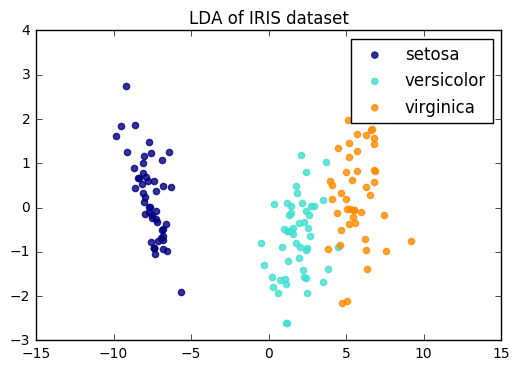

In [14]:
plt.show()

In [17]:
print(X_r[y == i, 0])

[ 2.53172698  1.41407223  2.61648461  1.97081495  2.34975798  3.39687992
  0.51938325  2.9320051   2.31967279  2.91813423  1.66193495  1.80234045
  2.16537886  1.34459422  1.5852673   1.90474358  1.94924878  3.48876538
  3.79468686  1.29832982  2.42816726  1.19809737  3.49926548  1.38766825
  2.27585365  2.61419383  1.25762518  1.29066965  2.12285398  2.3875644
  2.84096093  3.2323429   2.15873837  1.4431026   1.77964011  3.07652162
  2.14498686  1.90486293  1.16885347  2.10765373  2.31430339  1.92245088
  1.41407223  2.56332271  2.41939122  1.94401705  1.52566363  1.76404594
  1.90162908  1.38966613]
